# Proyecto Final - Python - Software matemático y estadístico

*Kevin Cook, 2024-11-03*

## Introduction

*Atención: este notebook de Jupyter contiene las mismas demostraciones que el 
notebook principal SoMaEs_Projecto_Final_Python_Kevin_Cook_v37.ipynb, pero con 
las funciones y datasets movidos a un paquete instalable (somaes_python).*

Python es el lenguaje de programación que utilizo más habitualmente para 
proyectos en mi vida profesional y personal. Hasta hace unos años, nunca lo 
había utilizado en un entorno de data science o machine learning. Entonces, a 
partir de unos cursos online, conocí la pila Numpy/Pandas/Jupyer, y ahora en 
el programa KISA, lo utilizamos para la mayoría de nuestros proyectos. Este 
notebook es el documento principal que demuestra mi implementación de las 
funciones requeridas en Python.

Mi approach para este curso fue desarrollar las implementaciones de las 
funciones Python y R simultáneamente, o casi. Sentí que esto me permitía 
enterarme de los puntos fuertes y débiles de cada plataforma, y decidir cuál 
preferiría utilizar en futuros proyectos en los que tuviera flexibilidad para 
hacerlo. Las implementaciones de han resultado ser muy similares, con la 
excepción de un uso intensivo de tuples en Python (que no existen en R), y el 
tipo de datos categorical explícito en R, que he intentado incluir siempre que 
he podido. Nótese que he tomado la decisión de diseño de considerar siempre 
variables integers como datos categoricos (en ambas implementaciones) en 
cualquier contexto en el que pudieran ser interpretarse como tales. Mi 
razonamiento para esto fue que las variables integer pueden se pueden 
convertir en floats si no quiero que sean categóricas.

### Libraries and global options

In [15]:
import somaes_python as sp
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

## Functions to be implemented

### Discretization algorithms

*Algoritmos de discretización para un solo atributo y para un dataset completo (ambas opciones): Igual frecuencia e igual anchura*

In [16]:
test = 'example vector from P03 exercises'; fcn = 'discretizeEW'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
print(f'  p03_desc_values:{sp.p03_disc_values} \n  num_cut:{sp.p03_disc_bins}')
ex_disc, ex_points = sp.discretizeEW(sp.p03_disc_values, sp.p03_disc_bins)
print('  discretized into 4 bins with EW \n    ', ex_disc)
print('  cut_points: \n    ', ex_points )

test = 'example vector from P03 exercises'; fcn = 'discretizeEF'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
print(f'  p03_desc_values:{sp.p03_disc_values} \n  num_cut:{sp.p03_disc_bins}')
ex_disc, ex_points = sp.discretizeEF(sp.p03_disc_values, sp.p03_disc_bins)
print('  discretized into 4 bins with EF \n    ', ex_disc)
print('  cut_points: \n    ', ex_points )

test = 'larger vector generated at random'; fcn = 'discretizeEF'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
random_values = np.random.uniform(low=0.0, high=25.0, size=50)
num_cut = 7
print(f'  random_values:\n {random_values}\n  num_cut: {num_cut}')
ex_discretized, ex_cut_points = sp.discretizeEF(random_values, num_cut)
print(f'  discretized into {num_cut} bins with EW \n    {ex_discretized}',)
print(f'  cut_points: \n    {ex_cut_points}')
print('')

#### Testing discretizeEW() with example vector from P03 exercises

  p03_desc_values:[11.5 10.2  1.2  0.5  5.3 20.5  8.4] 
  num_cut:4
  discretized into 4 bins with EW 
     ['I3:(10.5,15.5)', 'I2:(5.5,10.5)', 'I1:(-Inf,5.5)', 'I1:(-Inf,5.5)', 'I1:(-Inf,5.5)', 'I4:(15.5,+Inf)', 'I2:(5.5,10.5)']
  cut_points: 
     [ 5.5 10.5 15.5]


#### Testing discretizeEF() with example vector from P03 exercises

  p03_desc_values:[11.5 10.2  1.2  0.5  5.3 20.5  8.4] 
  num_cut:4
  discretized into 4 bins with EF 
     ['I4:(10.85,+Inf)', 'I3:(9.3,10.85)', 'I1:(-Inf,3.25)', 'I1:(-Inf,3.25)', 'I2:(3.25,9.3)', 'I4:(10.85,+Inf)', 'I2:(3.25,9.3)']
  cut_points: 
     [ 3.25  9.3  10.85]


#### Testing discretizeEF() with larger vector generated at random

  random_values:
 [20.44588511 16.02441513 18.12754515  7.24197531 23.86460012  4.31669908
  0.75349885  6.30265275 23.10572304 13.58709444 24.70989751  6.35508486
 15.5109647   7.4004298  12.76724022  6.21615706 14.11345661 15.07516265
  8.72134301 17.25705848 16.51369794  6.79148261  2.15481381 16.34146677
  6.60494479  4.14740036 17.15300018 19.44548579  2.8835065  13.68023183
  8.89487613 22.90330338 20.78173147  4.42528677 23.72158698 17.15036316
 22.32407987 19.58158916 24.02913739  1.588488   11.92864038 23.63363236
 21.79005815  4.60177759 11.33403364  1.82499834 23.31257737 15.52997145
 17.69599224 16.09522024]
  num_cut: 7
  discretized into 7 bins with EW 
    ['I6:(18.787,23.005)', 'I4:(13.634,16.218)', 'I5:(16.218,18.787)', 'I2:(4.514,7.321)', 'I7:(23.005,+Inf)', 'I1:(-Inf,4.514)', 'I1:(-Inf,4.514)', 'I2:(4.514,7.321)', 'I7:(23.005,+Inf)', 'I3:(7.321,13.634)', 'I7:(23.005,+Inf)', 'I2:(4.514,7.321)', 'I4:(13.634,16.218)', 'I3:(7.321,13.634)', 'I3:(7.321,13.634)', 'I2:(4.514

In [17]:
num_rows, num_bins = 10, 8
disc_df_test_df = pd.DataFrame({
    'A': np.random.randint(1, 101, size=num_rows),
    'B': np.random.randint(1, 201, size=num_rows),
    'C': np.random.randint(50, 301, size=num_rows)
})

test = 'random data, multiple columns'; 
fcn = 'discretize_EW_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.discretize_EW_by_column(disc_df_test_df, num_bins))

test = 'random data, multiple columns, keeping originals'; 
fcn = 'discretize_EW_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.discretize_EW_by_column(disc_df_test_df, num_bins, 
                                    keep_original=True))

test = 'random data, multiple columns'; 
fcn = 'discretize_EF_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.discretize_EF_by_column(disc_df_test_df, num_bins))

test = 'random data, multiple columns, keeping originals'; 
fcn = 'discretize_EF_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.discretize_EF_by_column(disc_df_test_df, num_bins, 
                                keep_original=True))    

first_two = disc_df_test_df.iloc[:, [0, 1]]
test = 'random data, comparison of first two columns'; 
fcn = 'discretize_EW_EF_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.discretize_EW_EF_by_column(first_two, num_bins))


#### Testing discretize_EW_by_column() with random data, multiple columns

,A_EW,B_EW,C_EW
0,"I6:(55.125,65.75)","I1:(-Inf,22.375)","I5:(196.5,219.625)"
1,"I1:(-Inf,12.625)","I4:(65.125,86.5)","I2:(127.125,150.25)"
2,"I6:(55.125,65.75)","I8:(150.625,+Inf)","I8:(265.875,+Inf)"
3,"I3:(23.25,33.875)","I6:(107.875,129.25)","I3:(150.25,173.375)"
4,"I7:(65.75,76.375)","I4:(65.125,86.5)","I8:(265.875,+Inf)"
5,"I1:(-Inf,12.625)","I6:(107.875,129.25)","I1:(-Inf,127.125)"
6,"I8:(76.375,+Inf)","I8:(150.625,+Inf)","I3:(150.25,173.375)"
7,"I2:(12.625,23.25)","I8:(150.625,+Inf)","I2:(127.125,150.25)"
8,"I1:(-Inf,12.625)","I8:(150.625,+Inf)","I7:(242.75,265.875)"
9,"I4:(33.875,44.5)","I4:(65.125,86.5)","I3:(150.25,173.375)"


#### Testing discretize_EW_by_column() with random data, multiple columns, keeping originals

,A,A_EW,B,B_EW,C,C_EW
0,56,"I6:(55.125,65.75)",1,"I1:(-Inf,22.375)",197,"I5:(196.5,219.625)"
1,10,"I1:(-Inf,12.625)",80,"I4:(65.125,86.5)",135,"I2:(127.125,150.25)"
2,61,"I6:(55.125,65.75)",161,"I8:(150.625,+Inf)",288,"I8:(265.875,+Inf)"
3,32,"I3:(23.25,33.875)",121,"I6:(107.875,129.25)",160,"I3:(150.25,173.375)"
4,71,"I7:(65.75,76.375)",69,"I4:(65.125,86.5)",289,"I8:(265.875,+Inf)"
5,2,"I1:(-Inf,12.625)",121,"I6:(107.875,129.25)",104,"I1:(-Inf,127.125)"
6,87,"I8:(76.375,+Inf)",172,"I8:(150.625,+Inf)",154,"I3:(150.25,173.375)"
7,23,"I2:(12.625,23.25)",158,"I8:(150.625,+Inf)",137,"I2:(127.125,150.25)"
8,9,"I1:(-Inf,12.625)",169,"I8:(150.625,+Inf)",254,"I7:(242.75,265.875)"
9,43,"I4:(33.875,44.5)",66,"I4:(65.125,86.5)",168,"I3:(150.25,173.375)"


#### Testing discretize_EF_by_column() with random data, multiple columns

,A_EF,B_EF,C_EF
0,"I6:(49.5,58.5)","I1:(-Inf,33.5)","I6:(182.5,271.0)"
1,"I3:(9.5,27.5)","I3:(74.5,100.5)","I2:(119.5,145.5)"
2,"I7:(58.5,79.0)","I7:(159.5,165.0)","I7:(271.0,288.5)"
3,"I4:(27.5,37.5)","I5:(121.0,139.5)","I4:(157.0,164.0)"
4,"I7:(58.5,79.0)","I2:(33.5,74.5)","I8:(288.5,+Inf)"
5,"I1:(-Inf,5.5)","I5:(121.0,139.5)","I1:(-Inf,119.5)"
6,"I8:(79.0,+Inf)","I8:(165.0,+Inf)","I3:(145.5,157.0)"
7,"I3:(9.5,27.5)","I6:(139.5,159.5)","I2:(119.5,145.5)"
8,"I2:(5.5,9.5)","I8:(165.0,+Inf)","I6:(182.5,271.0)"
9,"I5:(37.5,49.5)","I2:(33.5,74.5)","I5:(164.0,182.5)"


#### Testing discretize_EF_by_column() with random data, multiple columns, keeping originals

,A,A_EF,B,B_EF,C,C_EF
0,56,"I6:(49.5,58.5)",1,"I1:(-Inf,33.5)",197,"I6:(164.0,225.5)"
1,10,"I2:(9.5,16.5)",80,"I4:(74.5,100.5)",135,"I2:(119.5,136.0)"
2,61,"I7:(58.5,79.0)",161,"I7:(159.5,170.5)",288,"I7:(225.5,288.5)"
3,32,"I4:(27.5,37.5)",121,"I5:(100.5,139.5)",160,"I5:(157.0,164.0)"
4,71,"I7:(58.5,79.0)",69,"I3:(67.5,74.5)",289,"I8:(288.5,+Inf)"
5,2,"I1:(-Inf,9.5)",121,"I5:(100.5,139.5)",104,"I1:(-Inf,119.5)"
6,87,"I8:(79.0,+Inf)",172,"I8:(170.5,+Inf)",154,"I4:(145.5,157.0)"
7,23,"I3:(16.5,27.5)",158,"I6:(139.5,159.5)",137,"I3:(136.0,145.5)"
8,9,"I1:(-Inf,9.5)",169,"I7:(159.5,170.5)",254,"I7:(225.5,288.5)"
9,43,"I5:(37.5,49.5)",66,"I2:(33.5,67.5)",168,"I6:(164.0,225.5)"


#### Testing discretize_EW_EF_by_column() with random data, comparison of first two columns

,A,A_EF,A_EW,B,B_EF,B_EW
0,56,"I6:(37.5,58.5)","I6:(55.125,65.75)",1,"I1:(-Inf,33.5)","I1:(-Inf,22.375)"
1,10,"I3:(9.5,16.5)","I1:(-Inf,12.625)",80,"I3:(67.5,100.5)","I4:(65.125,86.5)"
2,61,"I7:(58.5,79.0)","I6:(55.125,65.75)",161,"I7:(159.5,165.0)","I8:(150.625,+Inf)"
3,32,"I5:(27.5,37.5)","I3:(23.25,33.875)",121,"I5:(121.0,139.5)","I6:(107.875,129.25)"
4,71,"I7:(58.5,79.0)","I7:(65.75,76.375)",69,"I3:(67.5,100.5)","I4:(65.125,86.5)"
5,2,"I1:(-Inf,5.5)","I1:(-Inf,12.625)",121,"I5:(121.0,139.5)","I6:(107.875,129.25)"
6,87,"I8:(79.0,+Inf)","I8:(76.375,+Inf)",172,"I8:(165.0,+Inf)","I8:(150.625,+Inf)"
7,23,"I4:(16.5,27.5)","I2:(12.625,23.25)",158,"I6:(139.5,159.5)","I8:(150.625,+Inf)"
8,9,"I2:(5.5,9.5)","I1:(-Inf,12.625)",169,"I8:(165.0,+Inf)","I8:(150.625,+Inf)"
9,43,"I6:(37.5,58.5)","I4:(33.875,44.5)",66,"I2:(33.5,67.5)","I4:(65.125,86.5)"


### Calculation of metrics for the attributes of a dataset

*Cálculo de métricas para los atributos de un dataset: Varianza y AUC para las variables contínuas y entropía para las discretas. La función deberá reconocer el tipo de atributo y actuar en consecuencia. Notese que en el caso del AUC, el dataset debe ser supervisado, es decir, es necesario especificar una variable clase binaria con la que evaluar el AUC de los atributos numéricos.*

In [18]:
test = 'sample variance, df with a single column, known var=23.5'; 
fcn = 'calculate_variance'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
variance = sp.calculate_variance(sp.sample_variance_23p5_df)
with np.printoptions(precision=3):
    print('    variance: ', variance)

test = 'population variance, df with a single column, known var=2.917'; 
fcn = 'calculate_variance'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
variance = sp.calculate_variance(sp.pop_variance_2p917_df, sample=False)
with np.printoptions(precision=3):
    print('    variance: ', variance)

num_rows = 10
variance_df_test_df = pd.DataFrame({
    'A': np.random.randint(1, 101, size=num_rows),
    'B': np.random.randint(1, 201, size=num_rows),
    'C': np.random.randint(50, 301, size=num_rows)
})
test = 'random data, multiple columns'; 
fcn = 'calculate_variance'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
with np.printoptions(precision=3):
    print('    variance: ', sp.calculate_variance(variance_df_test_df))
display(variance_df_test_df)


#### Testing calculate_variance() with sample variance, df with a single column, known var=23.5

    variance:  [23.5]


#### Testing calculate_variance() with population variance, df with a single column, known var=2.917

    variance:  [2.917]


#### Testing calculate_variance() with random data, multiple columns

    variance:  [ 573.6   3149.656 5873.567]


,A,B,C
0,27,102,247
1,74,82,226
2,12,19,114
3,34,30,285
4,37,144,170
5,46,14,140
6,77,151,175
7,63,102,274
8,20,132,50
9,14,163,252


In [19]:
test = 'dataframe with known auc=1.0'; 
fcn = 'calculate_roc_auc'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
fpr, tpr, auc = sp.calculate_roc_auc(sp.auc_1p0_df)
with np.printoptions(precision=3):
    print('    fpr points: ', fpr)
    print('    tpr points: ', tpr)
    print('    auc: ', auc)

test = 'dataframe with known auc=0.75'; 
fcn = 'calculate_roc_auc'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
fpr, tpr, auc  = sp.calculate_roc_auc(sp.auc_0p75_df)
with np.printoptions(precision=3):
    print('    fpr points: ', fpr)
    print('    tpr points: ', tpr)
    print('    auc: ', auc)


#### Testing calculate_roc_auc() with dataframe with known auc=1.0

    fpr points:  [0.  0.  0.  0.  0.5 1. ]
    tpr points:  [0.    0.333 0.667 1.    1.    1.   ]
    auc:  1.0


#### Testing calculate_roc_auc() with dataframe with known auc=0.75

    fpr points:  [0.   0.   0.   0.25 0.25 0.25 0.25 0.5  0.5  0.75 1.  ]
    tpr points:  [0.    0.    0.    0.333 0.5   0.667 0.833 0.833 1.    1.    1.   ]
    auc:  0.75


In [20]:
test = 'dataframe from vector with known entropy=0.971'
fcn = 'calculate_entropy'
display(Markdown(f"#### Testing {fcn}() with {test}"))
entropy = sp.calculate_entropy(pd.DataFrame(sp.p03_entropy_0p971))
print('    entropy: ', entropy)

test = 'dataframe by column, varying types, known entropy=0.971' 
fcn = 'calculate_entropy'
display(Markdown(f"#### Testing {fcn}() with {test}"))
multicolumn_entropy_df = pd.DataFrame({
    'letters': ['a','a','c','c','c'],
    'integers': [ 10, 10, 23, 23, 23 ],
    'decimals': [ 0.5, 0.5, 0.45, 0.45, 0.45 ],
})
display(multicolumn_entropy_df)
for c in multicolumn_entropy_df.columns:
    print(f'  type: {c}')
    print(f'    result: {sp.calculate_entropy(multicolumn_entropy_df[[c]])}')

test = 'zero-length dataframe' 
fcn = 'calculate_entropy'
display(Markdown(f"#### Testing {fcn}() with {test}"))
zerolength_entropy_df = pd.DataFrame({ 'zerolength': [] })
for c in zerolength_entropy_df.columns:
    print(f'  type: {c}')
    print(f'    values: {zerolength_entropy_df[c].to_list()}')
    print(f'    result: {sp.calculate_entropy(zerolength_entropy_df[[c]])}')


#### Testing calculate_entropy() with dataframe from vector with known entropy=0.971

    entropy:  0.9709505944546686


#### Testing calculate_entropy() with dataframe by column, varying types, known entropy=0.971

,letters,integers,decimals
0,a,10,0.50
1,a,10,0.50
2,c,23,0.45
3,c,23,0.45
4,c,23,0.45


  type: letters
    result: 0.9709505944546686
  type: integers
    result: 0.9709505944546686
  type: decimals
    result: 0.9709505944546686


#### Testing calculate_entropy() with zero-length dataframe

  type: zerolength
    values: []
    result: None


In [21]:
display(sp.std_mixed_df)

test = 'standard mixed dataframe, display_precision=6'; 
fcn = 'dataset_metrics_summary'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.dataset_metrics_summary(sp.std_mixed_df,display_precision=6))

test = 'standard mixed dataframe, appending input'; 
fcn = 'dataset_metrics_summary'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.dataset_metrics_summary(sp.std_mixed_df,append_input=True))


,A,B,C,D,E,F,G
0,1,True,4.5,a,0.10,False,4.5
1,1,True,5.5,a,0.40,True,5.5
2,1,True,6.5,a,0.35,False,6.5
3,3,False,5.5,c,0.80,True,6.5
4,3,False,6.5,c,0.50,True,6.5


#### Testing dataset_metrics_summary() with standard mixed dataframe, display_precision=6

,A,B,C,D,E,F,G
(type),int64,bool,float64,object,float64,bool,float64
variance,,,0.7,,0.0645,,0.8
AUC,,,,,1.0,,
entropy,0.970951,0.970951,,0.970951,,,


#### Testing dataset_metrics_summary() with standard mixed dataframe, appending input

,A,B,C,D,E,F,G
(type),int64,bool,float64,object,float64,bool,float64
variance,,,0.7,,0.065,,0.8
AUC,,,,,1.0,,
entropy,0.971,0.971,,0.971,,,
0,1,True,4.5,a,0.1,False,4.5
1,1,True,5.5,a,0.4,True,5.5
2,1,True,6.5,a,0.35,False,6.5
3,3,False,5.5,c,0.8,True,6.5
4,3,False,6.5,c,0.5,True,6.5


### Normalization and standardization of variables

*Normalización y estandarización de variables, tanto de manera individual como para el dataset completo. Esto solo debe ser aplicado a atributos que sean numéricos.*

In [22]:
numeric_nrmn_stdn_df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [5, 4, 3, 2, 1]
})
display(Markdown(f"#### Example numeric dataframe"))
display(numeric_nrmn_stdn_df)

test = 'example numeric dataframe'; 
fcn = 'normalize_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.normalize_by_column(numeric_nrmn_stdn_df))

test = 'example numeric dataframe'; 
fcn = 'standardize_by_column'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.standardize_by_column(numeric_nrmn_stdn_df))


#### Example numeric dataframe

,A,B,C
0,1,10,5
1,2,20,4
2,3,30,3
3,4,40,2
4,5,50,1


#### Testing normalize_by_column() with example numeric dataframe

,A,B,C
0,0.00,0.00,1.00
1,0.25,0.25,0.75
2,0.50,0.50,0.50
3,0.75,0.75,0.25
4,1.00,1.00,0.00


#### Testing standardize_by_column() with example numeric dataframe

,A,B,C
0,-1.414214,-1.414214,1.414214
1,-0.707107,-0.707107,0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,-0.707107
4,1.414214,1.414214,-1.414214


### Filtering of variables based on the implemented metrics 

*Filtrado de variables en base a las métricas implementadas. Es decir, partiendo de un dataset, obtener uno nuevo donde todas las variables cumplan los requisitos indicado (por ejemplo, una entropía superior a un cierto umbral).*

In [23]:
display(Markdown(f"#### Standard mixed dataframe with metrics"))
display(sp.dataset_metrics_summary(sp.std_mixed_df, append_input=True))

test = 'filter dataframe for variance <= 0.71'
fcn = 'select_variables_by_metrics'
display(Markdown(f"#### Testing {fcn}() with {test}"))
rules = [('variance', '<=', 0.71)]
display(sp.select_variables_by_metrics(sp.std_mixed_df, rules))

test = 'filter dataframe for entropy >= 0.9'
fcn = 'select_variables_by_metrics'
display(Markdown(f"#### Testing {fcn}() with {test}"))
rules = [('entropy', '>=', 0.9)]
display(sp.select_variables_by_metrics(sp.std_mixed_df, rules))

#### Standard mixed dataframe with metrics

,A,B,C,D,E,F,G
(type),int64,bool,float64,object,float64,bool,float64
variance,,,0.7,,0.065,,0.8
AUC,,,,,1.0,,
entropy,0.971,0.971,,0.971,,,
0,1,True,4.5,a,0.1,False,4.5
1,1,True,5.5,a,0.4,True,5.5
2,1,True,6.5,a,0.35,False,6.5
3,3,False,5.5,c,0.8,True,6.5
4,3,False,6.5,c,0.5,True,6.5


#### Testing select_variables_by_metrics() with filter dataframe for variance <= 0.71

,C,E
0,4.5,0.10
1,5.5,0.40
2,6.5,0.35
3,5.5,0.80
4,6.5,0.50


#### Testing select_variables_by_metrics() with filter dataframe for entropy >= 0.9

,D,A,B
0,a,1,True
1,a,1,True
2,a,1,True
3,c,3,False
4,c,3,False


### Calculation of the correlation/mutual information

*Cálculo de la correlación (información mutua en el caso de variables categóricas) por pares entre variables de un dataset. La función deberá considerar de que tipo es cada variable*

In [24]:
test = 'vectors from corr_m0p685_df known to have correlation=-0.6847868' 
fcn = 'correlation'
display(Markdown(f"#### Testing {fcn}() with {test}"))
x = sp.corr_m0p685_df['x'].to_numpy()
y = sp.corr_m0p685_df['y'].to_numpy()
print(f'  x: {x} \n  y: {y} \n')
print(f'    {fcn}: {sp.correlation(x, y):0.6f}')

test = 'identical vectors'; fcn = 'correlation'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
x = sp.corr_m0p685_df['x'].to_numpy()
y = sp.corr_m0p685_df['x'].to_numpy()
print(f'  x: {x} \n  y: {y} \n')
print(f'    {fcn}: {sp.correlation(x, y):0.6f}')

#### Testing correlation() with vectors from corr_m0p685_df known to have correlation=-0.6847868

  x: [8 3 5 7 1 2 6 7 4 9] 
  y: [2.  2.  1.5 1.  2.5 3.  1.5 2.  2.  1.5] 

    correlation: -0.684787


#### Testing correlation() with identical vectors

  x: [8 3 5 7 1 2 6 7 4 9] 
  y: [8 3 5 7 1 2 6 7 4 9] 

    correlation: 1.000000


In [25]:
test = 'vectors from np.array()'; fcn = 'mutual_information'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
x = np.array(['Red', 'Blue', 'Green', 'Red', 'Blue'])
y = np.array(['Circle', 'Square', 'Triangle', 'Square', 'Circle'])
print(f'  x: {x} \n  y: {y} \n')
print(f'    {fcn}: {sp.mutual_information(x, y):0.6f}')

test = 'the same vectors from a dataframe'; fcn = 'mutual_information'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
df = pd.DataFrame({
    'colors': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'shapes': ['Circle', 'Square', 'Triangle', 'Square', 'Circle'],
})
print(f'    {fcn}: {sp.mutual_information(df.colors, df.shapes):0.6f}')

test = 'longer vectors from np.array()'; fcn = 'mutual_information'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
x = np.array(['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'])
y = np.array(['X', 'X', 'X', 'Y', 'Z', 'Z', 'Y', 'Y', 'Z', 'Z'])
print(f'  x: {x} \n  y: {y} \n')
print(f'    {fcn}: {sp.mutual_information(x, y):0.6f}')

test = 'identical inputs from np.array()'; fcn = 'mutual_information'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
x = np.array(['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'])
y = np.array(['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B', 'B'])
print(f'  x: {x} \n  y: {y} \n')
print(f'    {fcn}: {sp.mutual_information(x, y):0.6f}')

test = 'example data from the HMS Titanic disaster'; 
fcn = 'mutual_information'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
titanic_mutinfo=sp.mutual_information(sp.titanic_df.Sex,sp.titanic_df.Condition)
print(f'    {fcn}: {titanic_mutinfo:0.6f}')
display(sp.titanic_df)


#### Testing mutual_information() with vectors from np.array()

  x: ['Red' 'Blue' 'Green' 'Red' 'Blue'] 
  y: ['Circle' 'Square' 'Triangle' 'Square' 'Circle'] 

    mutual_information: 0.500402


#### Testing mutual_information() with the same vectors from a dataframe

    mutual_information: 0.500402


#### Testing mutual_information() with longer vectors from np.array()

  x: ['A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B'] 
  y: ['X' 'X' 'X' 'Y' 'Z' 'Z' 'Y' 'Y' 'Z' 'Z'] 

    mutual_information: 0.502193


#### Testing mutual_information() with identical inputs from np.array()

  x: ['A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B'] 
  y: ['A' 'B' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'B'] 

    mutual_information: 0.693147


#### Testing mutual_information() with example data from the HMS Titanic disaster

    mutual_information: 0.139673


,Sex,Condition
0,Female,Survived
1,Female,Survived
2,Male,Deceased
3,Male,Deceased
4,Male,Deceased
...,...,...
909,Male,Survived
910,Male,Survived
911,Male,Deceased
912,Male,Deceased


In [26]:
test = 'example data from the HMS Titanic disaster as dataframe'; 
fcn = 'column_relationships'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.titanic_df)
correlation_df, mutual_information_df = sp.column_relationships(sp.titanic_df)
display(Markdown(f"##### Correlation between numeric variables"))
display(correlation_df)
display(Markdown(f"##### Mutual information between categorical variables"))
display(mutual_information_df)

test = 'standard mixed dataframe'; 
fcn = 'column_relationships'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
display(sp.std_mixed_df)
correlation_df,mutual_information_df = sp.column_relationships(sp.std_mixed_df)
display(Markdown(f"##### Correlation between numeric variables"))
display(correlation_df)
display(Markdown(f"##### Mutual information between categorical variables"))
display(mutual_information_df)


#### Testing column_relationships() with example data from the HMS Titanic disaster as dataframe

,Sex,Condition
0,Female,Survived
1,Female,Survived
2,Male,Deceased
3,Male,Deceased
4,Male,Deceased
...,...,...
909,Male,Survived
910,Male,Survived
911,Male,Deceased
912,Male,Deceased


##### Correlation between numeric variables

""


##### Mutual information between categorical variables

,Sex,Condition
Sex,0.646835,0.139673
Condition,0.139673,0.661143


#### Testing column_relationships() with standard mixed dataframe

,A,B,C,D,E,F,G
0,1,True,4.5,a,0.10,False,4.5
1,1,True,5.5,a,0.40,True,5.5
2,1,True,6.5,a,0.35,False,6.5
3,3,False,5.5,c,0.80,True,6.5
4,3,False,6.5,c,0.50,True,6.5


##### Correlation between numeric variables

,C,E,G
C,1,0.376497,0.868599
E,0.376497,1,0.759389
G,0.868599,0.759389,1


##### Mutual information between categorical variables

,A,B,D,F
A,0.673012,0.673012,0.673012,0.291103
B,0.673012,0.673012,0.673012,0.291103
D,0.673012,0.673012,0.673012,0.291103
F,0.291103,0.291103,0.291103,0.673012


### Plots for the AUC and correlation/mutual information matrices

*Plots para el AUC y para las matrices de correlación/información mutua.*


#### Testing plot_roc_auc() with ROC AUC curve, auc_1p0_df dataset

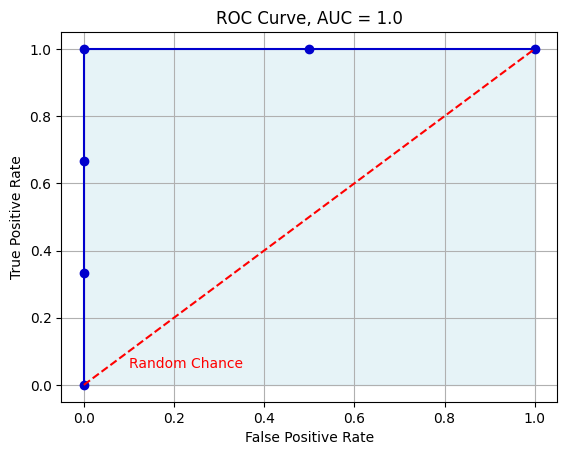

#### Testing plot_roc_auc() with ROC AUC curve, auc_0p75_df dataset

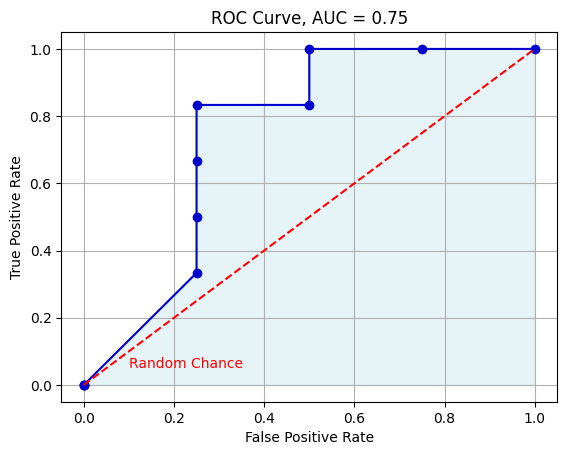

In [27]:
test = 'ROC AUC curve, auc_1p0_df dataset'; 
fcn = 'plot_roc_auc'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
ROC_fpr, ROC_tpr, AUC = sp.calculate_roc_auc(sp.auc_1p0_df)
sp.plot_roc_auc(ROC_fpr, ROC_tpr, AUC)

test = 'ROC AUC curve, auc_0p75_df dataset'; 
fcn = 'plot_roc_auc'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))
ROC_fpr, ROC_tpr, AUC = sp.calculate_roc_auc(sp.auc_0p75_df)
sp.plot_roc_auc(ROC_fpr, ROC_tpr, AUC)


#### Testing plot_relationships() with dataset from the HMS Titanic

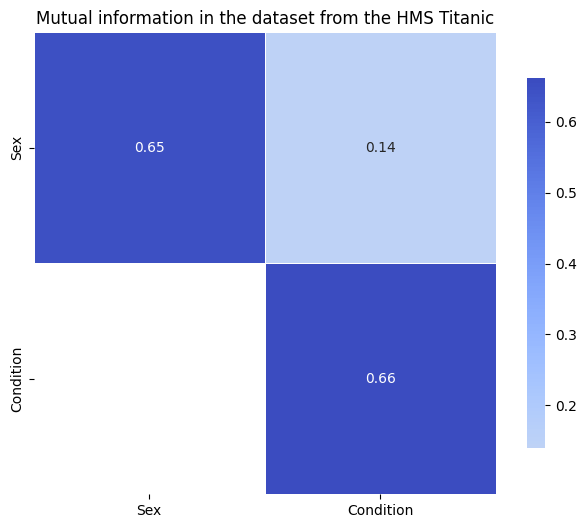

#### Testing plot_relationships() with standard mixed df

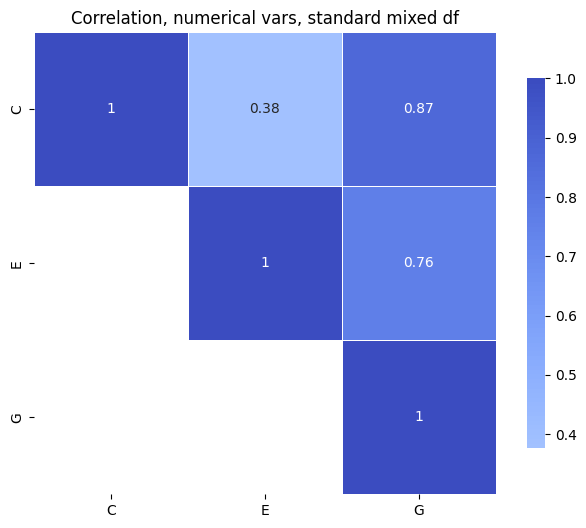

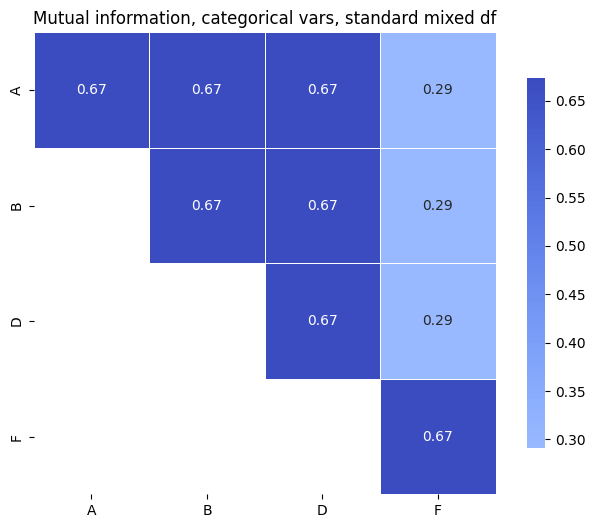

In [28]:
test = 'dataset from the HMS Titanic'; 
fcn = 'plot_relationships'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))

correlation_df,mutual_information_df=sp.column_relationships(sp.titanic_df)
sp.plot_relationships(mutual_information_df, 
                      title='Mutual information in the ' + test)

test = 'standard mixed df'; 
fcn = 'plot_relationships'; 
display(Markdown(f"#### Testing {fcn}() with {test}"))

correlation_df,mutual_information_df=sp.column_relationships(sp.std_mixed_df)
sp.plot_relationships(correlation_df, 
                        title='Correlation, numerical vars, ' + test)
sp.plot_relationships(mutual_information_df, 
                        title='Mutual information, categorical vars, ' + test)